# Unsupervised learning

On se propose dans ce TP d'explorer deux approches fondamentales d'apprentissage non supervisé. Tout d'abord, nous effectuons une analyse en composantes principales (PCA) en utilisant la bibliothèque Scikit-learn, afin de réduire la dimensionnalité des données et de mieux comprendre leur structure intrinsèque. Ensuite, nous appliquons l'algorithme de k-means pour résoudre un problème de compression d'image en couleurs, exploitant les prototypes générés pour représenter efficacement les données tout en réduisant leur complexité.

In [1]:
from sklearn import datasets
import skimage.color
import matplotlib.pyplot as plt
import numpy as np

## Apprentissage des représentations avec l'ACP (Analyse en Composantes Principales)

## Analyse en composantes principales

L'analyse en composantes principales (ACP) est l'un des premiers outils utilisés pour l'analyse de données.
Dans cette partie, notre objectif est d'analyser la similarité entre des chiffres manuscrits.

Nous utiliserons le petit ensemble de données de chiffres fourni par Scikit-learn. Les images sont de taille 8x8 pixels.

(1797, 64)


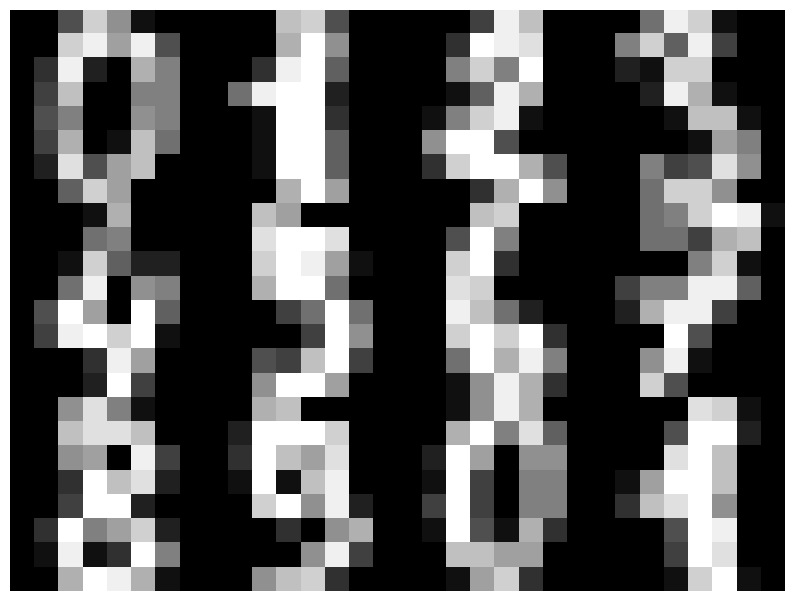

In [128]:
# Load data
dataset = datasets.load_digits()
data = dataset["data"]
labels = dataset["target"]

# print the dataset shape
print(data.shape)

# Print several sample data

width=8
height = 8
ncols = 4

nsample = ncols*3

nrows= nsample // ncols

fig = plt.figure(figsize=(10, 10))
img_grid = (data[:nsample,:].reshape(nrows, ncols, height, width)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
plt.imshow(img_grid, cmap='gray')
plt.axis('off')
plt.show()


Les données manipulées sont les suivantes :

1. **Données d'images numériques** :  
   - Chaque image est représentée par une matrice de pixels de taille 8x8.  
   - Les pixels sont codés par des valeurs numériques en niveaux de gris, reflétant l'intensité lumineuse.  
   - Ces matrices sont aplaties en vecteurs de 64 dimensions pour être facilement utilisées dans les algorithmes d'apprentissage.

2. **Données catégoriques** :  
   - Les étiquettes associées aux images (`labels`) indiquent les classes des chiffres manuscrits (de 0 à 9).  
   - Ce sont des données discrètes, utilisées pour représenter la classe de chaque exemple.


### Ajustement de l'ACP (Analyse en Composantes Principales)

L'utilisation de l'Analyse en Composantes Principales (ACP) pour explorer les données permet de réduire leur dimensionnalité tout en préservant l'essentiel de l'information.

1. **Création d'un objet PCA** :  
   Un objet PCA a été créé en utilisant la classe `PCA` de Scikit-learn avec un nombre de composantes principales fixé à 16.

2. **Ajustement de l'ACP** :  
   L'ajustement de l'Analyse en Composantes Principales (ACP) a été réalisé sur les données en appelant la méthode `fit`, qui calcule les composantes principales.

3. **Extraction des composantes principales** :  
   Les composantes principales sont accessibles via l'attribut `components_`. Ces composantes représentent les axes principaux de variation dans les données.

4. **Visualisation des composantes** :  
   Les composantes principales ont été visualisées sous forme d'images en niveaux de gris sur une grille. Cette représentation permet d'explorer visuellement les motifs sous-jacents identifiés par l'ACP.


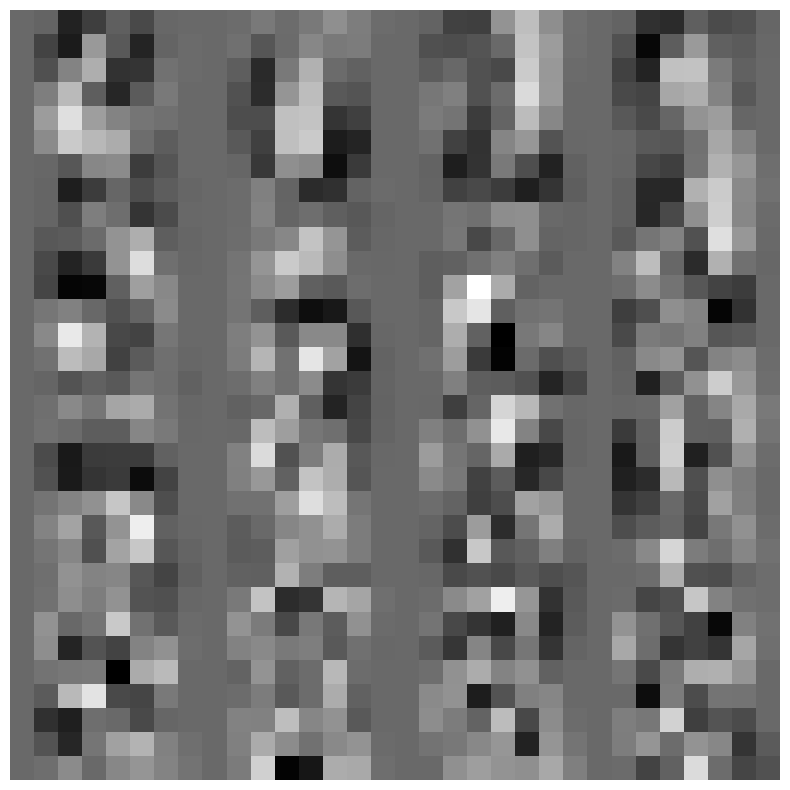

In [129]:
from sklearn import decomposition
ncomponent = 16

pca = decomposition.PCA(ncomponent)
pca.fit(data)

def image_grid(array, ncols=4):
    index, height, width, channels = array.shape
    nrows = index//ncols

    img_grid = (array.reshape(nrows, ncols, height, width, channels)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))

    return img_grid

width=8
height = 8
ncols = 4
nrows= ncomponent // ncols

fig = plt.figure(figsize=(10, 10))
img_grid = (pca.components_.reshape(nrows, ncols, height, width)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
plt.imshow(img_grid, cmap='gray')
plt.axis('off')
plt.show()

## Visualization

Après ça, on a appliqué une transformation des données en projetant les données sur les deux premières composantes principales à l'aide de la méthode `transform` de l'objet PCA. Cette étape permet de réduire la dimensionnalité des données tout en capturant l'essentiel de leur variance.

Ensuite, les données transformées sont visualisées avec la fonction `plt.scatter`, où les coordonnées des points sont issues des deux premières composantes principales. Les étiquettes des données sont utilisées comme indication de couleur via le paramètre `c`, ce qui permet de différencier les différentes classes de chiffres manuscrits.

En examinant la visualisation, on peut observer que les points représentant les différentes classes de chiffres se regroupent souvent, ce qui montre que les premières composantes principales capturent efficacement la structure sous-jacente des données. Cependant, des chevauchements apparaîssent, indiquant que la séparation des classes n'est pas toujours parfaite, même après réduction de la dimensionnalité.


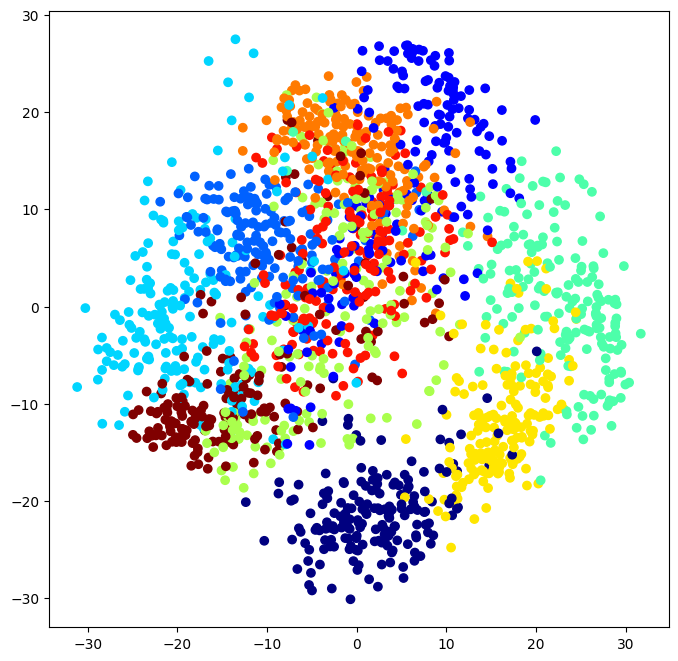

In [130]:
# project data on the two first components
pred = pca.transform(data)

# plot the points
plt.figure(figsize=(8,8))
plt.scatter(pred[:,0], pred[:,1], c=labels, cmap="jet")

Nous avons exploré un autre algorithme pour visualiser les données : le t-SNE (t-Distributed Stochastic Neighbor Embedding). Ce modèle est particulièrement efficace pour réduire des données de haute dimension à un espace de dimension plus faible, comme un espace à 2 ou 3 dimensions, tout en conservant les relations de proximité entre les points.

En se basant sur la figure ci-dessus, où les données ont été projetées dans un espace à deux dimensions avec une perplexité de 10, on peut observer l'impact significatif du t-SNE sur la classification des chiffres manuscrits. Les différents groupes de chiffres sont clairement séparés, chaque cluster représentant une classe spécifique de chiffres, ce qui montre que le t-SNE réussit à capturer la structure sous-jacente des données. La couleur des points dans le graphique est attribuée en fonction des étiquettes des données, ce qui permet de visualiser facilement les groupes de chiffres et de voir comment le t-SNE maintient la cohérence des classes tout en réduisant la dimensionnalité.

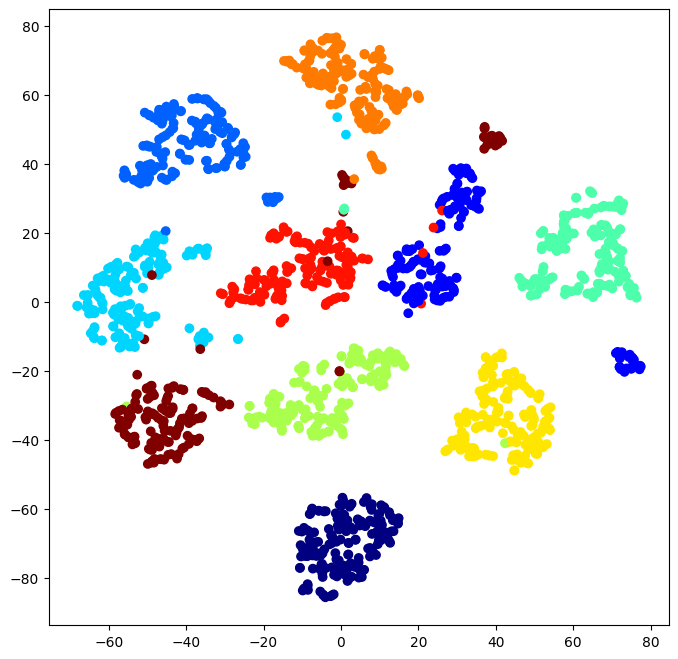

In [131]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=10, n_jobs=-1).fit_transform(data)

# plot the points
plt.figure(figsize=(8,8))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap="jet")


## Débruitage

L'objectif ici est d'utiliser l'ACP pour réduire le bruit des données. Le principe consiste à projeter les données sur les composantes principales, puis à générer les données reconstruites en utilisant une combinaison linéaire des composantes. Cela permet de réduire les effets du bruit tout en préservant l'essentiel de l'information contenue dans les données.

Le bruit a été ajouté aux données initiales à l'aide d'une distribution normale pour générer des valeurs aléatoires. Ensuite, l'ACP a été appliquée pour débruiter les données. La méthode `transform` de la classe PCA de Scikit-learn permet de projeter les données bruitées sur les composantes principales, tandis que la méthode `inverse_transform` est utilisée pour reconstruire les données en utilisant ces composantes. Une autre approche consiste à utiliser la formule de reconstruction $PP^T.(X-\bar{X})+\bar{X}$  , où $P$  est la matrice de projection sur les composantes principales et $\bar{X}$  est la moyenne des données.

L'impact du nombre de composantes principales utilisées est évident. En testant plusieurs valeurs de composantes, il est possible de constater que plus le nombre de composantes est faible, plus le débruitage perd de détails, mais permet une meilleure suppression du bruit. En revanche, en augmentant le nombre de composantes, la qualité de la reconstruction s'améliore, mais le bruit peut aussi persister dans une certaine mesure. Il est donc important de trouver un équilibre pour obtenir une reconstruction fidèle tout en éliminant le bruit efficacement.

La figure ci-dessous montre l'impact du débruitage appliqué aux données corrompues. Le bruit est réduit, mais certains détails peuvent être perdus selon le nombre de composantes utilisées pour la reconstruction.


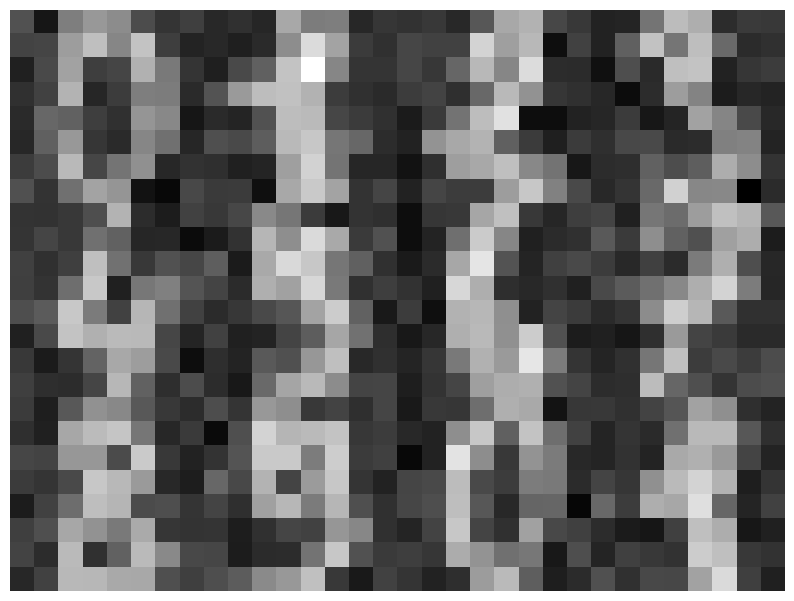

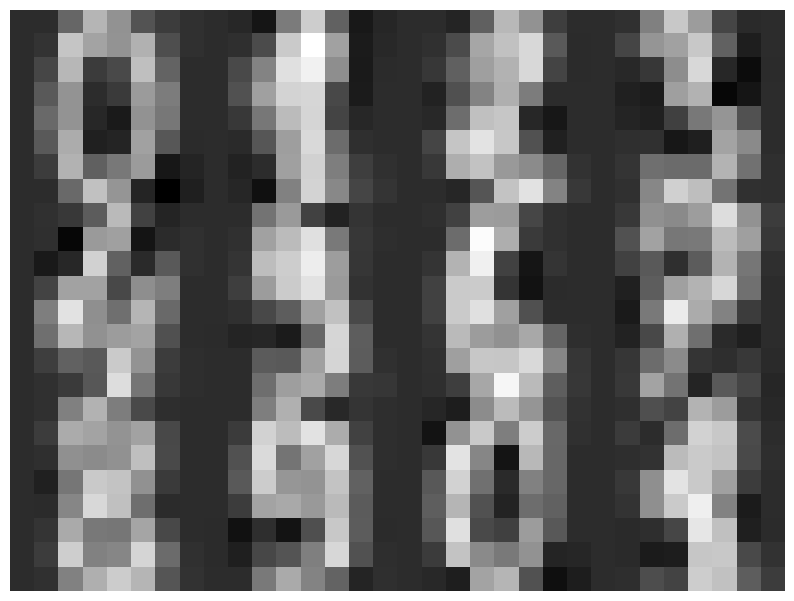

In [11]:
# Corrupted data
ns = np.random.normal(0,2, data.shape)
noised = data + ns

# Display corrupted samples

width=8
height = 8
ncols = 4

nsample = ncols*3

nrows= nsample // ncols

fig = plt.figure(figsize=(10, 10))
img_grid = (noised[:nsample,:].reshape(nrows, ncols, height, width)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
plt.imshow(img_grid, cmap='gray')
plt.axis('off')
plt.show()

data_pca = pca.transform(noised)
filtered = pca.inverse_transform(data_pca)

filtered2 = (noised - pca.mean_) @ pca.components_.T @ pca.components_ + pca.mean_


fig = plt.figure(figsize=(10, 10))
img_grid = (filtered[:nsample,:].reshape(nrows, ncols, height, width)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
plt.imshow(img_grid, cmap='gray')
plt.axis('off')
plt.show()


# Clustering

### Compression de couleur

Dans cette section, nous voulons appliquer le clustering pour coder les pixels de couleur d'une image. L'idée est de remplacer chaque pixel RGB par un code qui représente le prototype. Pour décoder l'image, il suffit de remplacer le code par son prototype pour chaque pixel dans le *codebook*.

Étant donné que les couleurs sont généralement codées avec 3 octets (8 bits, valeurs dans \[0, 255\]), une image sans compression peut être représentée par : $3 \times N \times 8$ bits, où $N$ est le nombre de pixels.

Si nous utilisons maintenant $K=16$ clusters, l'identifiant des clusters est codé sur 4 bits et nous avons besoin de $K \times 3 \times 8$ bits pour coder les prototypes. La taille de notre image devient alors :
$3 \times 8 \times K + 4 \times N$.

En pratique, le nombre de pixels est bien plus grand que le nombre de prototypes, et le taux de compression est :
$$ \frac{3 \times N \times 8}{3 \times 8 \times K + 4 \times N} \approx 6 $$

D'autres méthodes de compression (JPEG, PNG) peuvent faire bien mieux, mais reposent sur des approches de compression de signal très différentes.



(427, 640, 3)


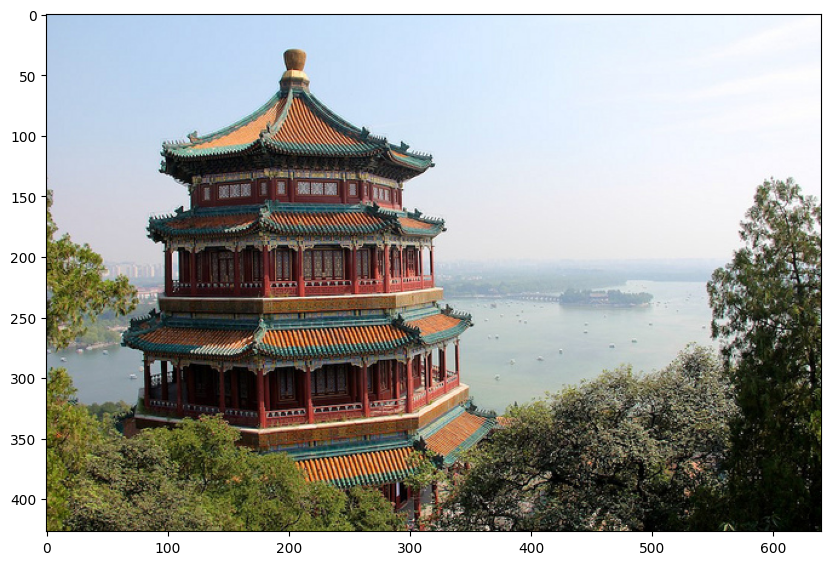

In [79]:
# get the image and display it
image = datasets.load_sample_image("china.jpg")
print(image.shape)

plt.figure(figsize=(10,15))
plt.imshow(image)


## K-means

Nous allons utiliser la fonction `K-means` de Scikit-learn comme algorithme de clustering. Son objectif est de calculer le *codebook* qui remplace chaque valeur de pixel par le numéro du centroïde du cluster (c'est-à-dire le code).

Le script ci-dessous permet de créer une image décodée à partir des codes générés par le clustering et du *codebook*. En effet, chaque pixel dans l'image encodée est associé à un code, qui correspond à un centroïde de cluster. Le processus de décodage consiste à remplacer chaque code dans l'image encodée par la valeur RGB du prototype associé dans le *codebook*. Cela permet de reconstruire une image approximative de l'original, où chaque pixel est désormais représenté par l'un des prototypes issus du clustering.

Le code parcourt donc l'image codée et pour chaque code, il remplace le pixel par la couleur (le prototype) qui lui correspond dans le *codebook*. À la fin, une image décompressée est obtenue, où chaque pixel est un prototype représentant un groupe de pixels similaires de l'image originale. Ce processus est une forme de compression d'image, car l'image est représentée par un nombre réduit de couleurs (les prototypes) au lieu de valeurs RGB uniques pour chaque pixel.


In [132]:
# create the decoded image from the image of codes and the codebook
def decode(codes, codebook):
  compressed_image = np.zeros((codes.shape[0],codes.shape[1],len(codebook[0])))
  for i in range(len(codebook)):
      mask = (codes==i)
      compressed_image[mask] = codebook[i]
  return compressed_image.astype(np.uint8)


## Affichage de l'image originale, image encodée et image reconstruite après décodage

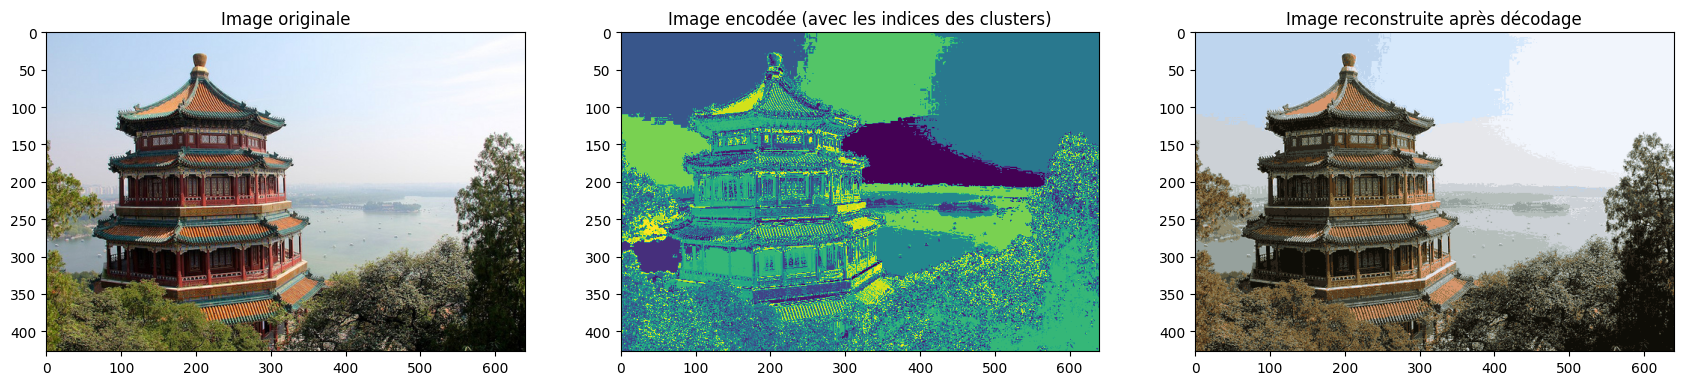

In [133]:
from sklearn.cluster import KMeans

code_size = 16  # Nombre de clusters

# Application de K-means sur l'image
clustering = KMeans(n_clusters=code_size, random_state=0, n_init="auto").fit(image.reshape(-1, image.shape[-1]))
codebook = clustering.cluster_centers_

# Encodage de l'image
encoded_image = clustering.predict(image.reshape(-1, image.shape[-1])).reshape(image.shape[0], image.shape[1])

# Décodage de l'image
decoded_image = decode(encoded_image, codebook)

# Affichage des résultats
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 14))

# Image originale
ax1.imshow(image)
ax1.set_title("Image originale")

# Image encodée
ax2.imshow(encoded_image)
ax2.set_title("Image encodée (avec les indices des clusters)")

# Image reconstruite après décodage
ax3.imshow(decoded_image)
ax3.set_title("Image reconstruite après décodage")

plt.show()


## Ségmentation

Dans cette section, nous proposons d'utiliser l'encodage d'image pour segmenter une image. Il s'agit d'une stratégie simple mais efficace lorsque l'objet au premier plan est visuellement distinct du fond. Regrouper les pixels permet de faciliter la définition du fond.

Le code suivant permet de segmenter l'image en utilisant les résultats d'un algorithme de clustering (ici K-means) pour encoder les pixels de l'image en un nombre réduit de couleurs. Chaque pixel de l'image est affecté à un cluster spécifique en fonction de sa couleur, et ce code assigne des couleurs spécifiques à certains clusters pour effectuer la segmentation.

Dans ce code, nous commençons par récupérer les centres des clusters (les prototypes de couleurs) via `clustering.cluster_centers_`. Ensuite, nous sélectionnons certains indices de clusters via `blk_id = [0, 2, 4, 6, 7, 11, 12]` qui correspondent aux régions de l'image que nous souhaitons définir comme arrière-plan ou zones non intéressantes. Nous remplaçons ensuite ces clusters par une couleur spécifique (ici, le vert `[0, 255, 0]`) afin de les isoler et de les visualiser plus clairement. Après cette modification, l'image segmentée est générée avec la fonction `decode`, qui reconstruit l'image en utilisant le codebook modifié. Enfin, l'image segmentée est affichée à l'aide de `plt.imshow(segmented_image)`.

Cela permet de mieux distinguer les différentes parties de l'image en fonction de leur appartenance à un cluster spécifique, facilitant ainsi la segmentation de l'objet au premier plan par rapport au fond.

### Résumé du fonctionnement :
- **Clustering :** Chaque pixel est affecté à un cluster, et ces clusters sont représentés par des couleurs distinctes.
- **Segmentation :** Les pixels de certains clusters (définis dans `blk_id`) sont remplacés par une couleur de fond (par exemple, vert).
- **Reconstruction :** L'image segmentée est reconstruite à partir de cette information et affichée pour visualisation.

Ce processus est utile pour séparer des objets de leur arrière-plan de manière simple mais efficace, en particulier lorsque l'objet au premier plan est facilement identifiable grâce à ses couleurs distinctes.


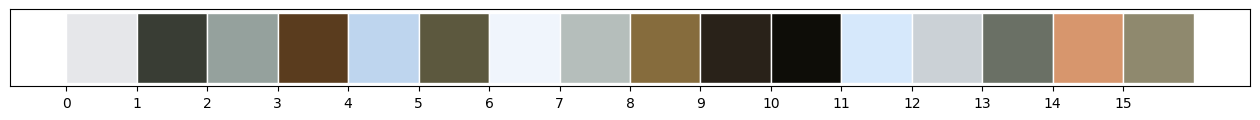

In [134]:
## Code for displaying colormap
fig, ax = plt.subplots(1,1, figsize=(len(codebook),1))
for x, cc in enumerate(codebook):
  color = cc/256
  rect = plt.Rectangle([x, 0], 1, 1,
                             facecolor=color, edgecolor='white')
  ax.add_patch(rect)

ax.autoscale_view()
ax.set_xticks(np.arange(len(codebook)))
ax.set_yticks([])
plt.show()

(-0.5, 639.5, 426.5, -0.5)

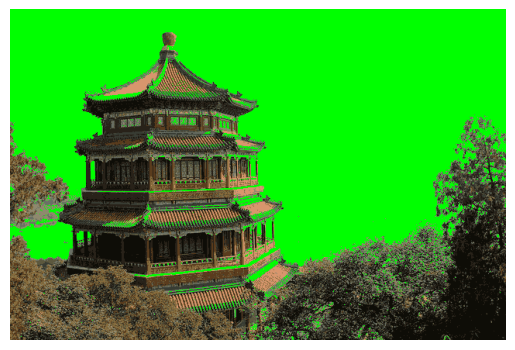

In [135]:
seg = clustering.cluster_centers_.copy()
blk_id = [0,2,4,6,7,11, 12]
seg[blk_id,:]=[0,255,0]
segmented_image = decode(encoded_image,seg)

plt.imshow(segmented_image)
plt.axis('off')

